### Machine Learning II Homework

In this homework, we're going to compare the results of an SVN classifier with those of a Gaussian Naive Bayes classifier on the same data set.

First, we'll make the data set.

In [4]:
from sklearn.datasets import make_blobs

In [5]:
# Create two 2D blobs of data
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=42, cluster_std=3.14)

Now, let's take a look at it to see what we're dealing with.

In [6]:
from matplotlib import pyplot as plt

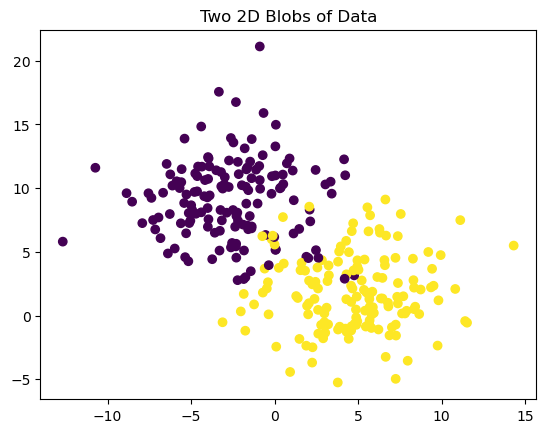

In [7]:
# Plot the blobs of data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Two 2D Blobs of Data")
plt.show()

Clearly, there is overlap between the categories, so there are bound to be classification mistakes. That's life. But let's see how well the SVN and GNB handle them.

---

First, split the data into training and test subsets. Set a `random_state` seed for reproducibility. We'll use the exact same split for both classifiers to make the comparison fair. Make it a 70/30 training/test split.  (Don't forget to import the needed module.)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

___

### Classify the data using an SVM classifier

In [10]:
from sklearn.svm import SVC

In [11]:
# Create a Support Vector Machine (SVM) classifier and train it on the training data
svm = SVC(kernel='linear')

In [18]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
# Evaluate the classifier's performance
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[40  2]
 [ 3 45]]


---

### Classify the data using an GNB classifier

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
# Create a Naive Bayes classifier
gnb = GaussianNB()

In [19]:
# and train it on the PCA-transformed training data
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
# Make predictions on the PCA-transformed testing data
y_pred = gnb.predict(X_test)

In [21]:
# Evaluate the classifier's performance
conf_matrix_gnb = confusion_matrix(y_test, y_pred)
print(conf_matrix_gnb)

[[40  2]
 [ 3 45]]
